# Bankruptcy Data Set => Random Forest Vs XGBoost Performance on Imbalanced Data Set

## Table of Contents

- [**Imports**](#Imports)
- [**Data Preparation and Wrangling**](#Data-Preparation-and-Wrangling)
    - [Target Label Encoding](#Target-Label-Encoding)
    - [Feature Outlier Detection](#Feature-Outlier-Detection)
- [**Exploratory Data Analysis**](#Exploratory-Data-Analysis)
    - [Target EDA](#Target-EDA)
    - [Feature Correlation Matrix](#Feature-Correlation-Matrix)
    - [Feature Target Relationship](#Feature-Target-Relationship)
    - [**Baseline Model**](#Baseline-Model)
    - [Feature Engineering](#Feature-Engineering)
    - [Baseline Model Evaluation with Feature Engineering](#Baseline-Model-Evaluation-with-Feature-Engineering)
- [**Models**](#Models)
    - [Random Forest + SMOTE + Feature Engineering](#Random-Forest-+-SMOTE-+-Feature-Engineering)
    - [XGBoost+ Feature Engineering](#XGBoost-+-Feature-Engineering)
    - [XGBoost + Feature Engineering + Treshold Tuning + Scale_Pos_Weighting](#XGBoost-+-Feature-Engineering-+-Treshold-Tuning-+-Scale_Pos_Weighting)
- [**Conclusion & Evaluation**](#Conclusion-&-Evaluation)


## Imports

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

<a id ='DPW'></a>
## Data Preparation and Wrangling

In [2]:
bankruptcy_data_df = pd.read_csv("american_bankruptcy.csv")

In [3]:
bankruptcy_data_df.tail(20)

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
78662,C_8968,alive,2014,58.314,1.833,0.656,-45.934,5.488,-48.205,0.470,...,2.828,59.500,0.000,-46.590,0.995,9.143,-199.926,2.828,9.322,48.762
78663,C_8968,alive,2015,21.381,4.972,0.486,-33.631,1.025,-35.161,0.040,...,1.316,21.782,0.003,-34.117,-3.656,3.521,-235.087,1.316,3.524,34.947
78664,C_8968,alive,2016,9.049,1.077,0.190,-12.783,0.213,-13.116,0.030,...,0.545,9.198,0.000,-12.973,-0.532,2.391,-248.203,0.545,2.408,13.328
78665,C_8968,alive,2017,3.369,0.208,0.057,-10.647,0.000,-10.890,0.040,...,0.053,3.466,0.000,-10.704,-0.155,7.152,-259.121,0.053,7.181,10.700
78666,C_8969,alive,2014,1578.400,324.400,86.700,211.600,205.800,-29.900,327.300,...,843.200,4557.600,1400.800,124.900,518.800,242.600,-354.700,843.200,2005.000,631.600
78667,C_8969,alive,2015,2270.500,1216.700,250.900,524.000,517.500,-308.600,1148.000,...,2542.300,10190.200,5173.600,273.100,1325.600,1062.400,-1418.800,2542.300,7271.000,2018.300
78668,C_8969,alive,2016,2071.200,1723.300,342.300,723.600,416.400,-73.700,1054.800,...,3585.900,10054.100,5122.900,381.300,1862.600,1082.700,-1248.000,3585.900,7164.300,2862.300
78669,C_8969,alive,2017,2340.600,1833.200,354.200,758.100,490.400,-296.200,1156.000,...,3775.900,10252.400,5440.600,403.900,1942.700,1091.800,-1291.700,3775.900,7392.400,3017.800
78670,C_8969,alive,2018,2482.200,966.700,156.600,412.700,188.100,-324.400,382.400,...,1961.000,9401.500,5350.700,256.100,994.300,1142.500,-1952.300,1961.000,7220.400,1548.300
78671,C_8970,alive,2013,923.200,1206.000,45.600,409.000,314.600,31.000,266.100,...,2093.500,1979.900,1272.000,363.400,887.500,490.500,-96.200,2093.500,2035.600,1684.500


In [4]:
bankruptcy_data_df.isnull().sum()

company_name    0
status_label    0
year            0
X1              0
X2              0
X3              0
X4              0
X5              0
X6              0
X7              0
X8              0
X9              0
X10             0
X11             0
X12             0
X13             0
X14             0
X15             0
X16             0
X17             0
X18             0
dtype: int64

In [5]:
colums_to_drop = ['company_name','year']
bankruptcy_data_df= bankruptcy_data_df.drop(columns= colums_to_drop)

In [6]:
bankruptcy_data_df

,status_label,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,alive,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,alive,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,alive,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,alive,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,alive,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,alive,233.211,43.338,14.094,45.615,3.376,25.261,22.846,756.4827,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,alive,105.559,59.184,42.592,202.133,2.288,129.688,54.611,527.5750,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,alive,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,578.8868,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,alive,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,412.6241,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


In [7]:
mapper = {"X1": "Current_Assets",
          "X2": "COGS",
          "X3": "D&A",
          "X4": "EBITDA",
          "X5": "Inventory",
          "X6": "NI",
          "X7": "Tot_Reciev",
          "X8" : "MKT_val",
          "X9" : "Net_Sales",
          "X10" : "Tot_Assets",
          "X11" : "Tot_lt_Debt",
          "X12" : "EBIT",
          "X13" : "Gross_Profit",
          "X14" : "Tot_Cur_Liab",
          "X15" : "RE",
          "X16" : "Tot_Rev",
          "X17" : "Tot_Liab",
          "X18" : "Tot_Opex",
        }

In [8]:
bankruptcy_df = bankruptcy_data_df.rename(columns = mapper)
bankruptcy_df

,status_label,Current_Assets,COGS,D&A,EBITDA,Inventory,NI,Tot_Reciev,MKT_val,Net_Sales,Tot_Assets,Tot_lt_Debt,EBIT,Gross_Profit,Tot_Cur_Liab,RE,Tot_Rev,Tot_Liab,Tot_Opex
0,alive,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,alive,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,alive,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,alive,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,alive,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,alive,233.211,43.338,14.094,45.615,3.376,25.261,22.846,756.4827,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,alive,105.559,59.184,42.592,202.133,2.288,129.688,54.611,527.5750,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,alive,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,578.8868,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,alive,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,412.6241,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


<a id='targenc'></a>
### Target Label Encoding 

In [9]:
bankruptcy_df['Encoded_Target'] = bankruptcy_df['status_label'].map({'alive': 0, 'failed': 1})

bankruptcy_df[['status_label','Encoded_Target']].value_counts()

status_label  Encoded_Target
alive         0                 73462
failed        1                  5220
Name: count, dtype: int64

- for our machine learning Model Solvent companies will have an encoded value of 0 while insolvent companies will have an encoded value of 1

In [10]:
col = bankruptcy_df.pop('Encoded_Target')
bankruptcy_df.insert(1,'Encoded_Target', col)
bankruptcy_df.head(3)

,status_label,Encoded_Target,Current_Assets,COGS,D&A,EBITDA,Inventory,NI,Tot_Reciev,MKT_val,Net_Sales,Tot_Assets,Tot_lt_Debt,EBIT,Gross_Profit,Tot_Cur_Liab,RE,Tot_Rev,Tot_Liab,Tot_Opex
0,alive,0,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,alive,0,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,alive,0,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514


<a id='featdec'></a>
### Feature Outlier Detection

In [11]:
features_df = bankruptcy_df.drop(columns = ['status_label','Encoded_Target'],axis = 1 , inplace = False)
features_df.head(3)

,Current_Assets,COGS,D&A,EBITDA,Inventory,NI,Tot_Reciev,MKT_val,Net_Sales,Tot_Assets,Tot_lt_Debt,EBIT,Gross_Profit,Tot_Cur_Liab,RE,Tot_Rev,Tot_Liab,Tot_Opex
0,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514


In [12]:
agg=[]
def detect_outliers(df):
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = float(Q1 - 1.5 * IQR)
        upper_bound = float(Q3 + 1.5 * IQR)

        lower_outliers = df[df[column] < lower_bound].values.tolist()
        upper_outliers = df[df[column] > upper_bound].values.tolist()
        
        count_lower_outliers = len(lower_outliers)
        count_upper_outliers = len(upper_outliers)
        sum_out_liers = count_lower_outliers + count_upper_outliers

        agg.append([column,sum_out_liers])

    new_df = pd.DataFrame(agg, columns = ['Feature', 'Outlier_Count']) 

    plt.figure(figsize=(20,8))
    plt.bar(new_df['Feature'],new_df['Outlier_Count'], width = 0.5)
    plt.title("Outlier Count per Feature")
    plt.tight_layout()
    plt.show()
     
    return new_df

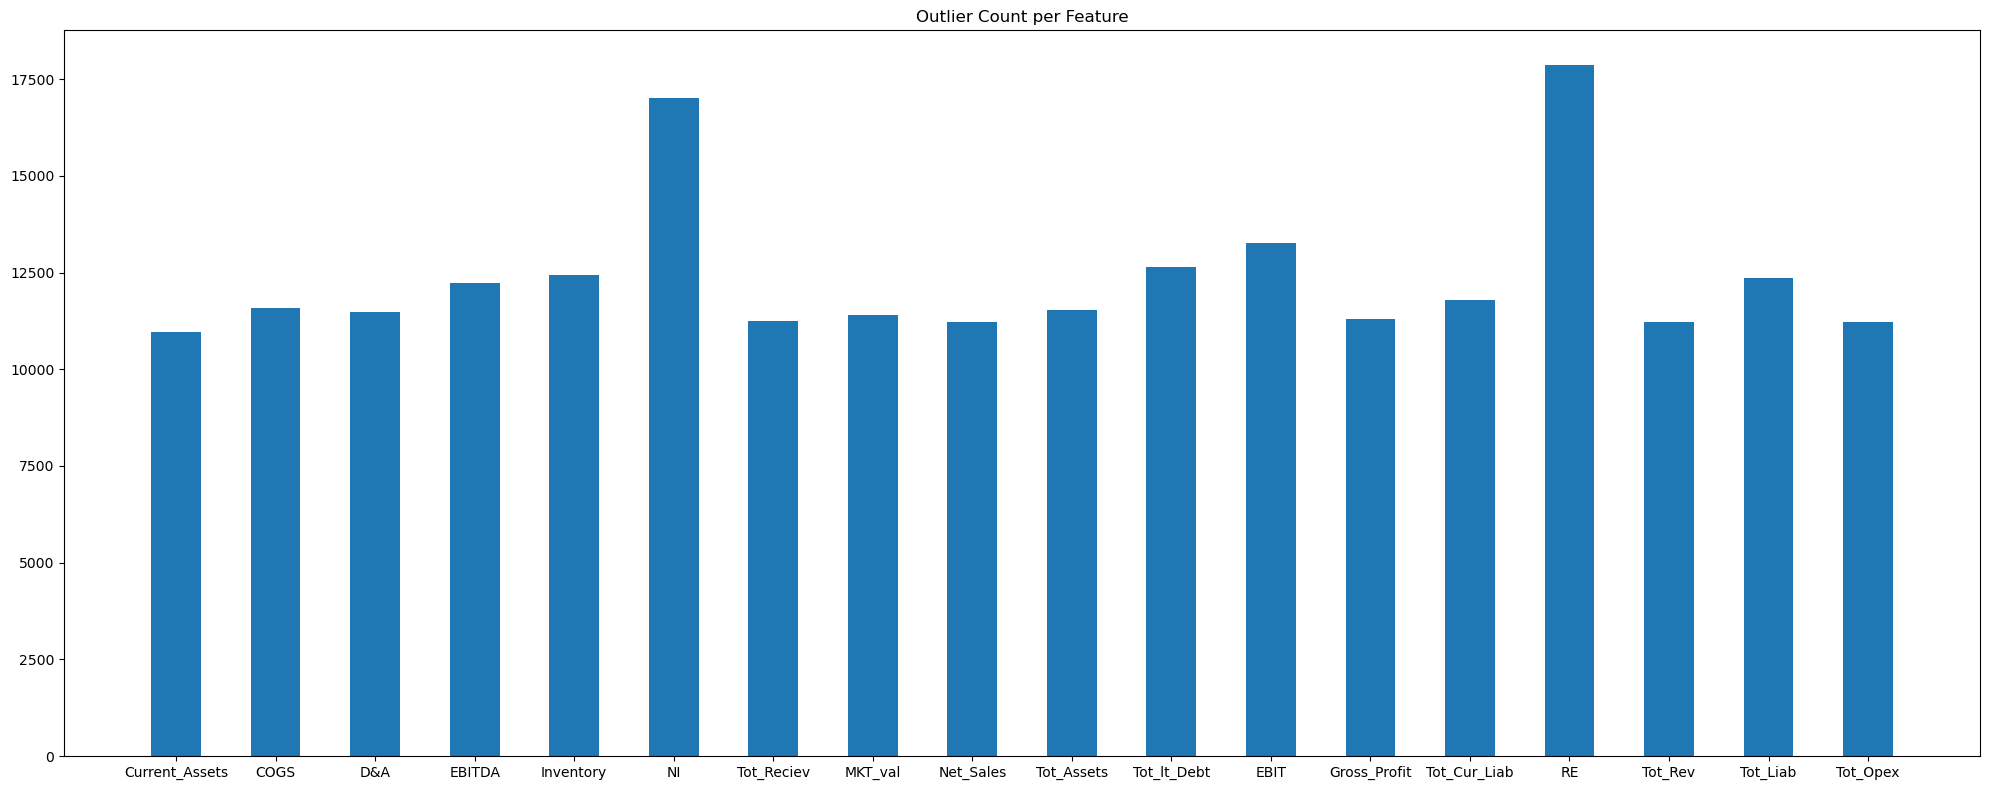

,Feature,Outlier_Count
0,Current_Assets,10975
1,COGS,11594
2,D&A,11475
3,EBITDA,12218
4,Inventory,12435
5,NI,17004
6,Tot_Reciev,11237
7,MKT_val,11409
8,Net_Sales,11225
9,Tot_Assets,11521


In [13]:
detect_outliers(features_df)

- After exploring the IQR for all features it seems clear that many outliers exist in the data.

The following steps can be used to address outliers:

1. Removal
2. Transformation (Log , Square-root)
3. Winsorization
4. Impute Outiers
5. Robust Algorithms (Random Forest , Isolation Forest , Logistic Regression)
6. Ensemble Learning

For this analysis we will a mix of point 5 & 6 . Imputing Outliers is another viable alternative given the nautre of the data expecially with the failed out comes

<a id='eda'></a>
# Exploratory Data Analysis

<a id='teda'></a>
## Target EDA

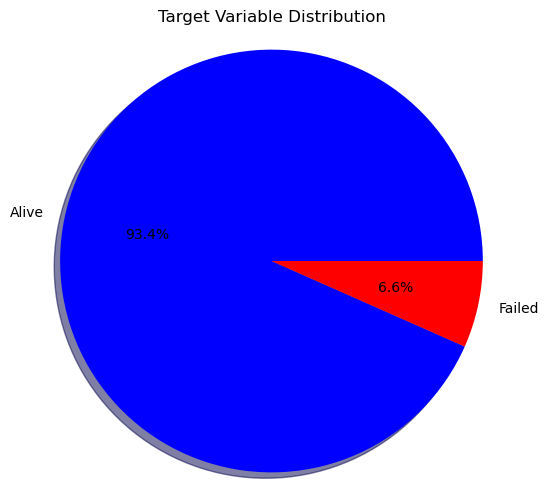

In [14]:
solvent_comp = bankruptcy_df['status_label'].value_counts()['alive']
insolvent_comp = bankruptcy_df['status_label'].value_counts()['failed']
all_comp = [solvent_comp,insolvent_comp]
labels = ['Alive','Failed']
colors = ['blue','red']

plt.figure(figsize=(6, 6))
plt.pie(all_comp,colors = colors , shadow = True,labels= labels, autopct = '%1.1f%%')
plt.title('Target Variable Distribution')
plt.axis('equal')
plt.show()

- The Target Variable shows that 93.4% of Companies are alive while only 6.6% of Companies are shown to be insolvent

With such as severe class imbalance predicitve models wil be biased towards the majority class and fail and successfully in identifying the minority class.

There are many ways to adress this class imbalance such as the following : 

1. Employ Class Balancing Techniques (oversampling/undersampling minority/majority class, SMOTE & ROSE)
2. Focus on class imbalance insesitive Measures such as F1-Score, Recall, Percision , AUC
3. Utilize algortihims that are not affected by class imbalance suc as Random Forest , Logistic Regression & XGBoost
4. Deploy Cost Sensitive Learning.

For this Analysis we will prioritize the F1 Score of our models while utilizing different sampling techniques accross the Rand Forest and XGBoost Algorithms. We will also tune the Treshold to maximize F1 Scores. Stratified K Folds will also be utilized to ascertain similar results are seen across different Train and Test Sets.

<a id='fcm'></a>
## Feature Correlation Matrix

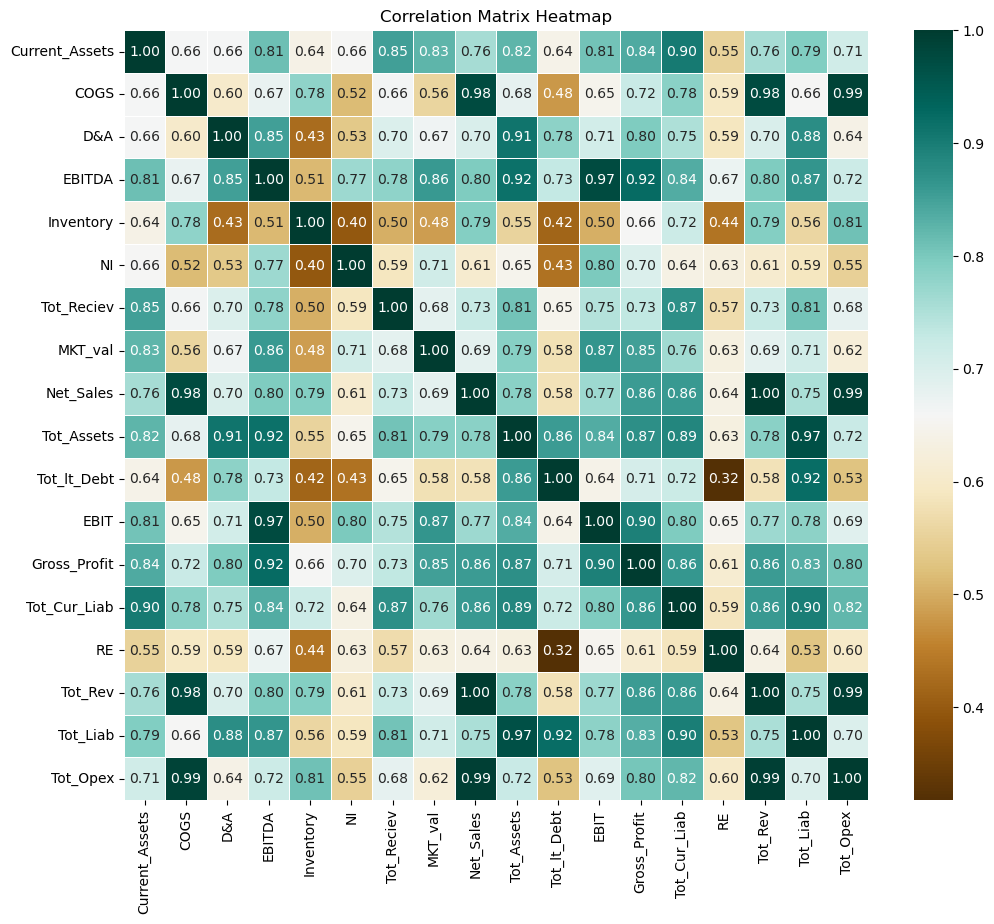

In [15]:
correlation_matrix = features_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

- Utilize the Correlation matrix to help in Feature Selection
- Given the high level of Correlation accross certain features we will start by droppinfg those with a correlataion above 95% (ignoring self correlations)

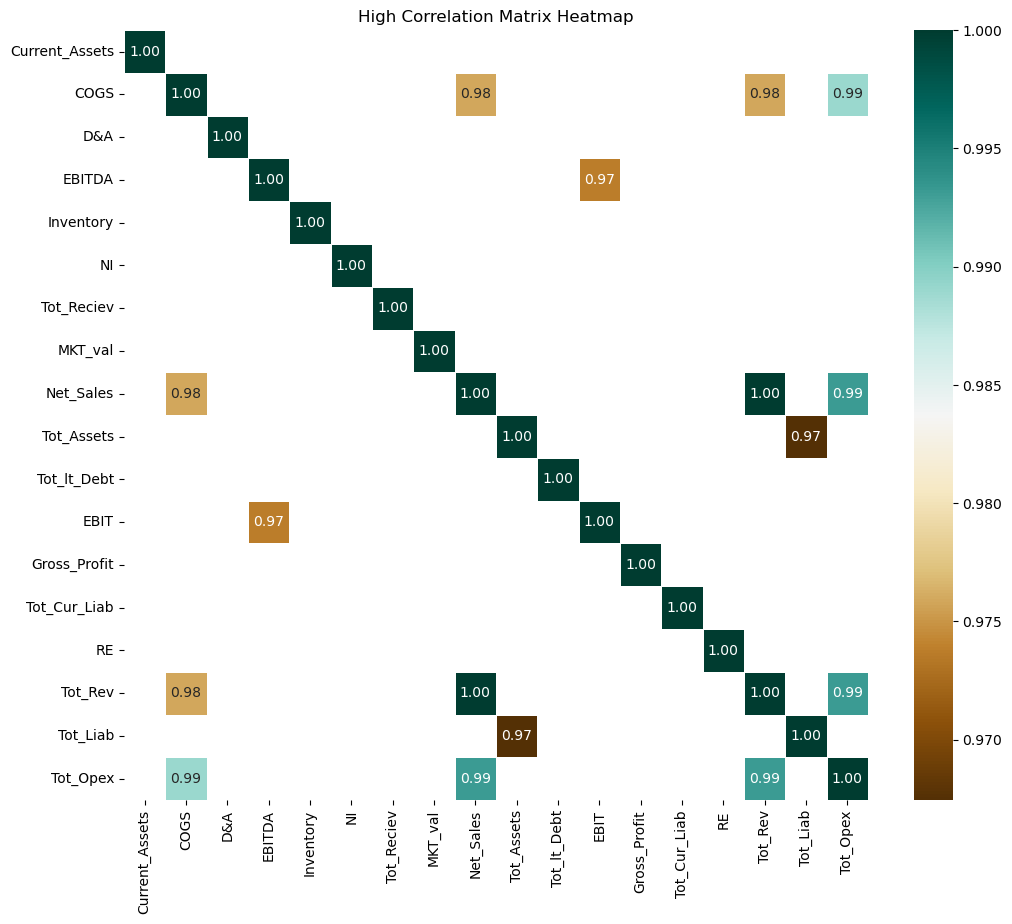

In [16]:
high_corr = correlation_matrix[correlation_matrix >= 0.95 ] 
plt.figure(figsize=(12, 10))
sns.heatmap(high_corr, annot=True, cmap='BrBG', fmt=".2f", linewidths=0.5)
plt.title('High Correlation Matrix Heatmap')
plt.show()

Observations and Decisions: 
- Net Sales and Total Revenue have a correlation of 1. Net Sales will be dropped and Total Revenue will be kept.
- Net Sales and Total Revenue are simply the same value so dropping one or the other will not impact model performance

In [17]:
baseline_features_df = features_df.drop(columns = ['Net_Sales'])
baseline_features_df = baseline_features_df.reset_index(drop=True)
baseline_features_df.describe()

,Current_Assets,COGS,D&A,EBITDA,Inventory,NI,Tot_Reciev,MKT_val,Tot_Assets,Tot_lt_Debt,EBIT,Gross_Profit,Tot_Cur_Liab,RE,Tot_Rev,Tot_Liab,Tot_Opex
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,7.868200e+04,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,3.414355e+03,2867.110620,722.483710,255.525035,769.490783,610.072255,532.467069,2364.019706,1773.563963,1987.260307
std,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,1.841410e+04,12917.944421,3242.170946,1494.643534,3774.703114,2938.387443,6369.159440,11950.068842,8053.684902,10419.629038
min,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000
25%,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,3.498000e+01,37.363500,0.000000,-2.787000,8.521250,8.889250,-68.282750,27.548500,13.486000,32.872500
50%,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,2.275118e+02,213.203500,7.593500,6.518000,63.581500,43.333000,-1.131000,186.598500,81.988000,168.912000
75%,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,1.244890e+03,1171.364750,248.760750,87.599000,344.074250,222.817000,146.070000,1046.402500,629.975000,875.522250
max,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000


<a id='ftr'></a>
## Feature Target Relationship

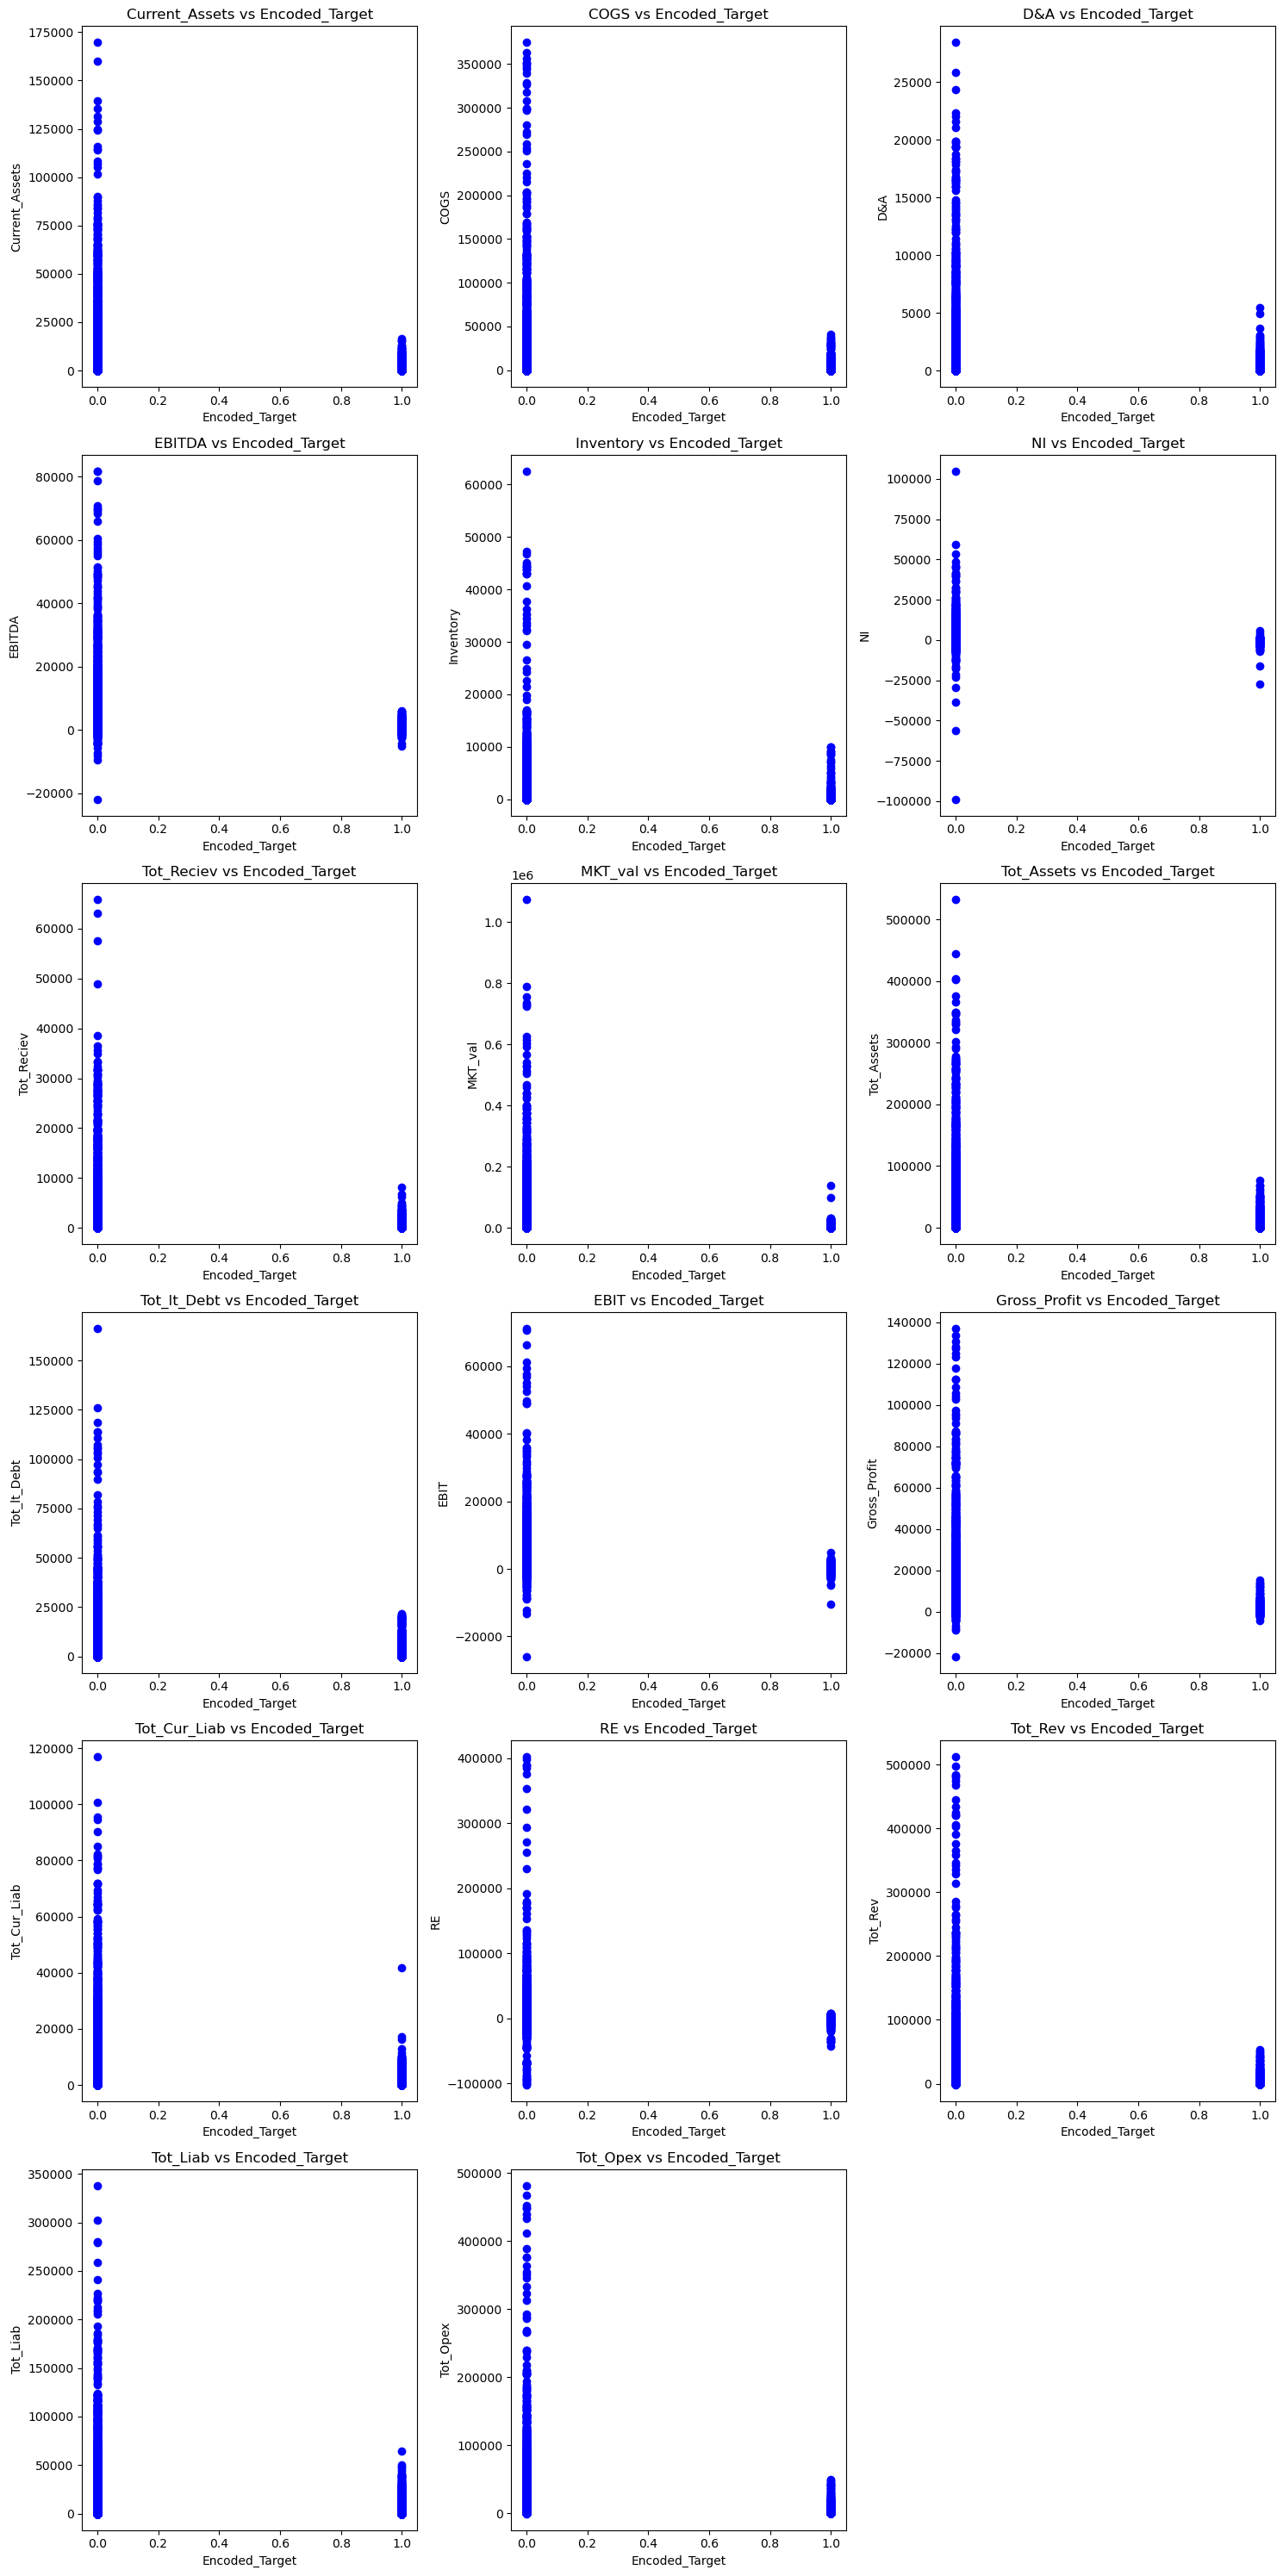

In [18]:
target_baseline_feat_df = baseline_features_df.copy()
target_baseline_feat_df['Encoded_Target'] = bankruptcy_df['Encoded_Target']
target_column = 'Encoded_Target'
features = target_baseline_feat_df.columns


num_features = len(target_baseline_feat_df.columns) - 1  


num_rows = (num_features + 2) // 3  


fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))


axes = axes.flatten()


for i, feature in enumerate(features):
    if feature != target_column:
        axes[i].scatter(target_baseline_feat_df[target_column], target_baseline_feat_df[feature], color='blue')  # Scatter plot
        axes[i].set_title(f'{feature} vs {target_column}')
        axes[i].set_xlabel(target_column)
        axes[i].set_ylabel(feature)


for i in range(num_features, len(axes)):
    axes[i].axis('off')  

plt.tight_layout()

<a id='bm'></a>
## Baseline Model

In [29]:
def run_baseline_model(df):
    
    X = df
    y = bankruptcy_df['Encoded_Target']
    
    n_splits = 5  #
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    fold = 1
    f1_scores = []
    rf= RandomForestClassifier(random_state=42)
    
    for train_index, test_index in skf.split(X, y):
        print(f"Fold {fold}")
        
        # Split the data into training and test sets
        X_train = df.iloc[train_index]
        X_test = df.iloc[test_index]
        y_train = y[train_index]
        y_test = y[test_index]
        
        # Train the model
        rf.fit(X_train, y_train)
        
        # Make predictions
        y_pred = rf.predict(X_test)
        
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        f1_scores.append(f1)

        print(f"Fold Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
        print(f"Fold Classification Report {fold}:\n{classification_report(y_test, y_pred)}")
        print("-" * 40)
        
        fold += 1

    print(f"Mean F1 Score: {np.mean(f1_scores)}")
    
run_baseline_model(baseline_features_df)

Fold 1
Fold Confusion Matrix:
[[14690     3]
 [  963    81]]
Fold Classification Report 1:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14693
           1       0.96      0.08      0.14      1044

    accuracy                           0.94     15737
   macro avg       0.95      0.54      0.56     15737
weighted avg       0.94      0.94      0.91     15737

----------------------------------------
Fold 2
Fold Confusion Matrix:
[[14686     7]
 [  970    74]]
Fold Classification Report 2:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14693
           1       0.91      0.07      0.13      1044

    accuracy                           0.94     15737
   macro avg       0.93      0.54      0.55     15737
weighted avg       0.94      0.94      0.91     15737

----------------------------------------
Fold 3
Fold Confusion Matrix:
[[14685     7]
 [  962    82]]
Fold Classification R

<a id='fe'></a>
## Feature Engineering

In [20]:
baseline_features_df.head(1)

,Current_Assets,COGS,D&A,EBITDA,Inventory,NI,Tot_Reciev,MKT_val,Tot_Assets,Tot_lt_Debt,EBIT,Gross_Profit,Tot_Cur_Liab,RE,Tot_Rev,Tot_Liab,Tot_Opex
0,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302


In [21]:
feature_eng_df = baseline_features_df.copy()
feature_eng_df['Equity'] = feature_eng_df['Tot_Assets'] - feature_eng_df['Tot_Liab']
feature_eng_df['Cur_Ratio'] = feature_eng_df['Current_Assets']/feature_eng_df['Tot_Cur_Liab']
feature_eng_df['Tot_L/Tot_A'] = feature_eng_df['Tot_Liab']/feature_eng_df['Tot_Assets']
feature_eng_df['Tot_A/Cur_A'] = feature_eng_df['Tot_Assets']/feature_eng_df['Current_Assets']
feature_eng_df['GP_Margin'] = feature_eng_df['Gross_Profit']/feature_eng_df['Tot_Rev']
feature_eng_df['Cur_A/Tot_Reciev'] = feature_eng_df['Current_Assets']/feature_eng_df['Tot_Reciev']
feature_eng_df['D&A/Tot_Assets'] = feature_eng_df['D&A']/feature_eng_df['Tot_Assets']

In [22]:
feature_eng_df=feature_eng_df.replace([np.inf, -np.inf], np.nan)

In [23]:
col_drop = ['EBITDA','Inventory','NI','Tot_lt_Debt','EBIT','Cur_Ratio','Tot_Cur_Liab','Tot_Opex','Equity','Tot_A/Cur_A','Tot_Rev','Tot_Assets','D&A/Tot_Assets','Tot_Reciev']
selected_features_df = feature_eng_df.drop(columns = col_drop)
mean_nan = selected_features_df['Cur_A/Tot_Reciev'].mean()
selected_features_df.fillna(mean_nan, inplace=True)

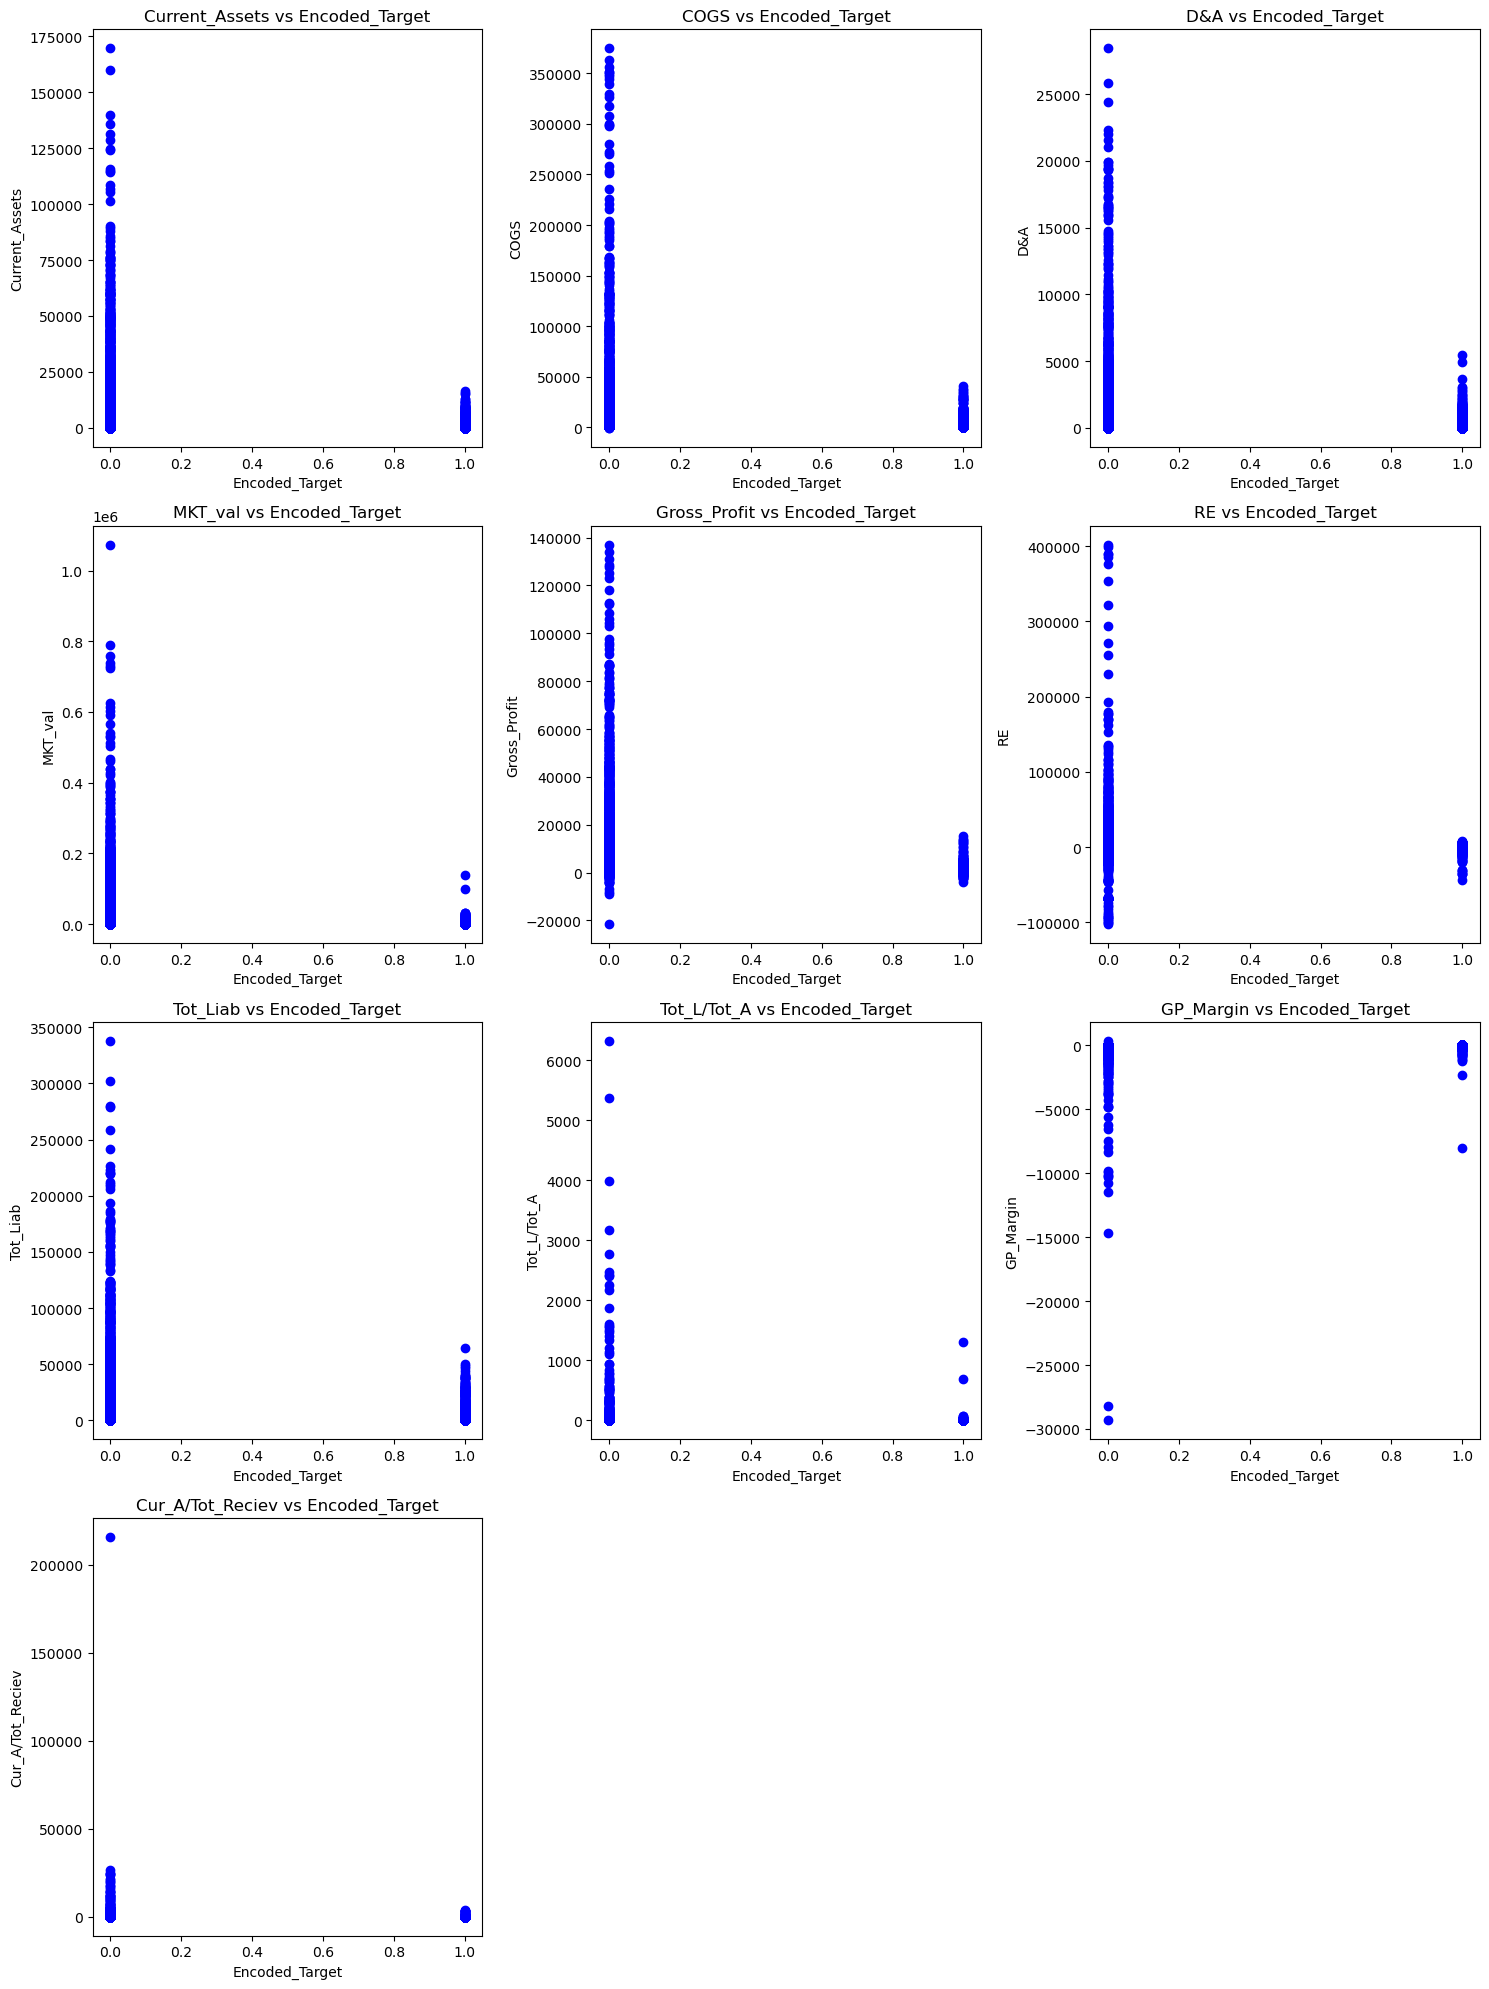

In [24]:
target_selected_feat_df = selected_features_df.copy()
target_selected_feat_df['Encoded_Target'] = bankruptcy_df['Encoded_Target']
target_column = 'Encoded_Target'
features = target_selected_feat_df.columns


num_features = len(target_selected_feat_df.columns) - 1  


num_rows = (num_features + 2) // 3  


fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))


axes = axes.flatten()


for i, feature in enumerate(features):
    if feature != target_column:
        axes[i].scatter(target_selected_feat_df[target_column], target_selected_feat_df[feature], color='blue')  # Scatter plot
        axes[i].set_title(f'{feature} vs {target_column}')
        axes[i].set_xlabel(target_column)
        axes[i].set_ylabel(feature)


for i in range(num_features, len(axes)):
    axes[i].axis('off')  

plt.tight_layout()

<a id='bmfe'></a>
## Baseline Model Evaluation with Feature Engineering

In [25]:
run_baseline_model(selected_features_df)

Fold 1
Fold Confusion Matrix:
[[14690     3]
 [  938   106]]
Fold Classification Report 1:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14693
           1       0.97      0.10      0.18      1044

    accuracy                           0.94     15737
   macro avg       0.96      0.55      0.58     15737
weighted avg       0.94      0.94      0.92     15737

----------------------------------------
Fold 2
Fold Confusion Matrix:
[[14682    11]
 [  946    98]]
Fold Classification Report 2:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14693
           1       0.90      0.09      0.17      1044

    accuracy                           0.94     15737
   macro avg       0.92      0.55      0.57     15737
weighted avg       0.94      0.94      0.92     15737

----------------------------------------
Fold 3
Fold Confusion Matrix:
[[14682    10]
 [  938   106]]
Fold Classification R

<a id='models'></a>
# Models

<a id='rfsmfe'></a>
## Random Forest + SMOTE + Feature Engineering

In [26]:
X = selected_features_df
y = bankruptcy_df['Encoded_Target']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
smote = SMOTE(random_state=42)

clf = RandomForestClassifier(random_state=42)

f1_scores = []
fold = 1 

for train_idx, test_idx in skf.split(X, y):
    X_train = selected_features_df.iloc[train_idx]
    X_test = selected_features_df.iloc[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]

    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    clf.fit(X_train_resampled, y_train_resampled)

    

    y_pred = clf.predict(X_test)

    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

    print(f"Fold Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Fold Classification Report {fold}:\n{classification_report(y_test, y_pred)}")
    print("-" * 40)
    fold +=1 

# Print mean F1 score across folds
print(f"Mean F1 Score: {np.mean(f1_scores)}")
    

Fold Confusion Matrix:
[[13935   758]
 [  511   533]]
Fold Classification Report 1:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     14693
           1       0.41      0.51      0.46      1044

    accuracy                           0.92     15737
   macro avg       0.69      0.73      0.71     15737
weighted avg       0.93      0.92      0.92     15737

----------------------------------------
Fold Confusion Matrix:
[[13953   740]
 [  551   493]]
Fold Classification Report 2:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     14693
           1       0.40      0.47      0.43      1044

    accuracy                           0.92     15737
   macro avg       0.68      0.71      0.69     15737
weighted avg       0.92      0.92      0.92     15737

----------------------------------------
Fold Confusion Matrix:
[[13951   741]
 [  558   486]]
Fold Classification Report 3:
            

<a id='xgbfe'></a>
## XGBoost + Feature Engineering 

In [27]:
X = selected_features_df  
y = bankruptcy_df['Encoded_Target']  

n_splits = 5 
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize the XGBoost Classifier
clf = xgb.XGBClassifier(
    n_estimators = 500 ,
    objective='binary:logistic',  
    random_state=42,
    eval_metric='aucpr',
    scale_pos_weight=7,  
    learning_rate=0.08,
    max_depth=100,
    subsample=1,
    colsample_bytree=1
)
f1_scores = []
fold = 1
for train_index, test_index in skf.split(X, y):
    print(f"Fold {fold}")
    
    # Split the data into training and test sets
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    # Train the XGBoost model
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

    print(f"Fold Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Fold Classification Report {fold}:\n{classification_report(y_test, y_pred)}")
    print("-" * 40)

    fold += 1

print(f"Mean F1 Score: {np.mean(f1_scores)}")

Fold 1
Fold Confusion Matrix:
[[14612    81]
 [  766   278]]
Fold Classification Report 1:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     14693
           1       0.77      0.27      0.40      1044

    accuracy                           0.95     15737
   macro avg       0.86      0.63      0.68     15737
weighted avg       0.94      0.95      0.93     15737

----------------------------------------
Fold 2
Fold Confusion Matrix:
[[14588   105]
 [  774   270]]
Fold Classification Report 2:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     14693
           1       0.72      0.26      0.38      1044

    accuracy                           0.94     15737
   macro avg       0.83      0.63      0.68     15737
weighted avg       0.93      0.94      0.93     15737

----------------------------------------
Fold 3
Fold Confusion Matrix:
[[14605    87]
 [  741   303]]
Fold Classification R

<a id='xgbfets'></a>
## XGBoost + Feature Engineering + Treshold Tuning + Scale_Pos_Weighting

In [28]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold

X = selected_features_df  
y = bankruptcy_df['Encoded_Target'] 

n_splits = 5  
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize the XGBoost Classifier
clf = xgb.XGBClassifier(
    n_estimators=500,
    objective='binary:logistic', 
    random_state=42,
    eval_metric='aucpr',
    scale_pos_weight=7,  
    learning_rate=0.1,
    max_depth=100,
    subsample=1,
    colsample_bytree=1
)
f1_scores = []
fold = 1
for train_index, test_index in skf.split(X, y):
    print(f"Fold {fold}")
    
    # Split the data into training and test sets
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
   
    clf.fit(X_train, y_train)
    
    # Get predicted probabilities
    y_prob = clf.predict_proba(X_test)[:, 1]  
    y_pred = (y_prob > 0.13).astype(int)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

    print(f"Fold Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Fold Classification Report {fold}:\n{classification_report(y_test, y_pred)}")
    print("-" * 40)

    fold += 1

print(f"Mean F1 Score: {np.mean(f1_scores)}")

Fold 1
Fold Confusion Matrix:
[[14323   370]
 [  585   459]]
Fold Classification Report 1:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     14693
           1       0.55      0.44      0.49      1044

    accuracy                           0.94     15737
   macro avg       0.76      0.71      0.73     15737
weighted avg       0.93      0.94      0.94     15737

----------------------------------------
Fold 2
Fold Confusion Matrix:
[[14335   358]
 [  633   411]]
Fold Classification Report 2:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14693
           1       0.53      0.39      0.45      1044

    accuracy                           0.94     15737
   macro avg       0.75      0.68      0.71     15737
weighted avg       0.93      0.94      0.93     15737

----------------------------------------
Fold 3
Fold Confusion Matrix:
[[14310   382]
 [  610   434]]
Fold Classification R

# Conclusion & Evaluation 
- We can see that although minimal the XGBoost model does out perform the Rand Forest.
- In it' Current State the models Presented can ne utilized to predict the positvie class (failed companies).
- This is mostly due to issues with the original data set and features.
- With additional Data Preprocessing the Model performance will increase significantly.